# Keyword Extraction Using NLP
These blocks process comments in a TSV on the desktop for keywords, bigrams, and trigrams. 
[Source Article](https://medium.com/analytics-vidhya/automated-keyword-extraction-from-articles-using-nlp-bfd864f41b34)

Include link to article (including set-up steps)

#### [Jupyter Notebook Shortcuts](https://gist.github.com/kidpixo/f4318f8c8143adee5b40):
 - i , i : interrupt kernel
 - 0 , 0 : restart kernel
 - ⇧ ↩ : run cell, select below
 - ⌃ ↩ : run cell
 - ⌥ ↩ : run cell, insert below


## 1. Load dataset and identify text fields to analyze

In [1]:
# Change current directory to desktop
# This isn't necessary for any of the analysis, but makes it easy to see and find file outputs
# Change this to whatever directory works for you if your desktop is a horror show
import os
usr = os.getlogin()
os.chdir('/Users/'+usr+'/Desktop')
cwd = os.getcwd()
print('Working in ', cwd, '\n')

# List TSV files on desktop and select the file to analyze
# CSVs will also work, but TSV is better for free text entry (people use commas in comments)
files = [f for f in os.listdir('.') if os.path.isfile(f)]
print('---\nTSV files currently on your desktop: \n')
for f in files:
    if '.tsv' in f:
        print(f)
data_file = input('\n---\nWhich file would like to analyze? \n\n')

# Prefix output files with TSV filename prefix—-these will be saved to your desktop
file_prefix = data_file.split('.')
file_prefix = file_prefix[0]+'_'
print('\nFile exports will be prefixed with:', file_prefix)

Working in  /Users/andyfitzgerald/Desktop 

---
TSV files currently on your desktop: 

rfi-data.tsv

---
Which file would like to analyze? 

rfi-data.tsv

File exports will be prefixed with: rfi-data_


In [2]:
# Load the dataset and view sample data and column headers
import pandas
dataset = pandas.read_csv(data_file, delimiter = '\t')
dataset.head()


,id,date,question
0,495996901,2019-04-21 8:38:01,||Hello there|I'm from Nepal looking for admis...
1,519163216,2019-07-10 12:58:12,"||Hello,||My name is. Currently, I am a second..."
2,447835205,2018-10-19 11:57:30,|Could you give me more information on agronom...
3,428788128,2018-08-01 23:31:43,"|Dear, I am a Brazilian student and would like..."
4,496056002,2019-04-21 19:22:45,|Hello my name is and I've recently enrolled t...


In [3]:
# Select the content column to analyze
datacol = input('\n---\nWhich column contains the text data you would like to analyze?\n\n')



---
Which column contains the text data you would like to analyze?

question


In [4]:
# View 10 most common words prior to text pre-processing
freq = pandas.Series(' '.join(map(str, dataset[datacol])).split()).value_counts()[:10]
freq

I      6928
to     6263
the    4576
and    3339
a      3127
in     3107
for    2778
my     1883
am     1828
of     1612
dtype: int64

In [5]:
# View 10 least common words prior to text pre-processing
freq1 =  pandas.Series(' '.join(map(str,dataset 
         [datacol])).split()).value_counts()[-10:]
freq1

Merci             1
II).              1
usable.|2.)The    1
Nepal.||Thank     1
VOC               1
scholarship?|I    1
Oh,               1
Consult||My       1
Koki              1
retirement,       1
dtype: int64

## 2. Create a list of stop words

In [6]:
# Import libraries for text preprocessing
import re
import nltk

# You only need to download these resources once. After you run this 
# the first time--or if you know you already have these installed--
# you can comment these two lines out (with a #)
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/andyfitzgerald/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/andyfitzgerald/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
# Create a list of stop words from nltk
stop_words = set(stopwords.words("english"))
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [8]:
# Load a set of custom stop words from a text file (one stopword per line)
csw = set(line.strip() for line in open('custom-stopwords.txt'))
csw = [sw.lower() for sw in csw]
print(sorted(csw))

['hello', 'thank', 'wondering', 'would']


In [9]:
# Combine custom stop words with stop_words list
stop_words = stop_words.union(csw)
print(sorted(stop_words))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'hello', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so'

## 3. Pre-process the dataset to get a cleaned, normalized text corpus  

In [10]:
# Pre-process dataset to get a cleaned and normalised text corpus
corpus = []
dataset['word_count'] = dataset[datacol].apply(lambda x: len(str(x).split(" ")))
ds_count = len(dataset.word_count)
for i in range(0, ds_count):
    # Remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', str(dataset[datacol][i]))
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove tags
    text=re.sub("&lt;/?.*?&gt;"," &lt;&gt; ",text)
    
    # Remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)
    
    # Convert to list from string
    text = text.split()
    
    # Stemming
    ps=PorterStemmer()
    
    # Lemmatisation
    lem = WordNetLemmatizer()
    text = [lem.lemmatize(word) for word in text if not word in  
            stop_words] 
    text = " ".join(text)
    corpus.append(text)

In [11]:
#View sample pre-processed corpus item
corpus[10]

'im looking esl program help tuition start date fee etc also wanna know apply college change status phone call great time'

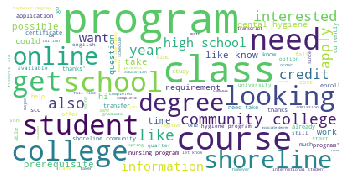

In [12]:
# Generate word cloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stop_words,
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(corpus))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig(file_prefix + "wordcloud.png", dpi=900)

In [13]:
# Tokenize the text and build a vocabulary of known words
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8,stop_words=stop_words, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(corpus)

In [14]:
# Sample the returned vector encoding the length of the entire vocabulary
list(cv.vocabulary_.keys())[:10]

['nepal',
 'looking',
 'admission',
 'shoreline',
 'college',
 'get',
 'degree',
 'like',
 'know',
 'required']

## 4. Extract most frequently occurring keywords and n-grams

        Keyword  Frequency
0       program       1778
1         class       1384
2          like        933
3       college        895
4          need        784
5       student        776
6        course        760
7          take        732
8     shoreline        726
9        school        720
10   interested        702
11       online        672
12          get        658
13       degree        615
14         year        611
15         know        607
16  information        536
17         time        437
18         want        436
19      looking        435


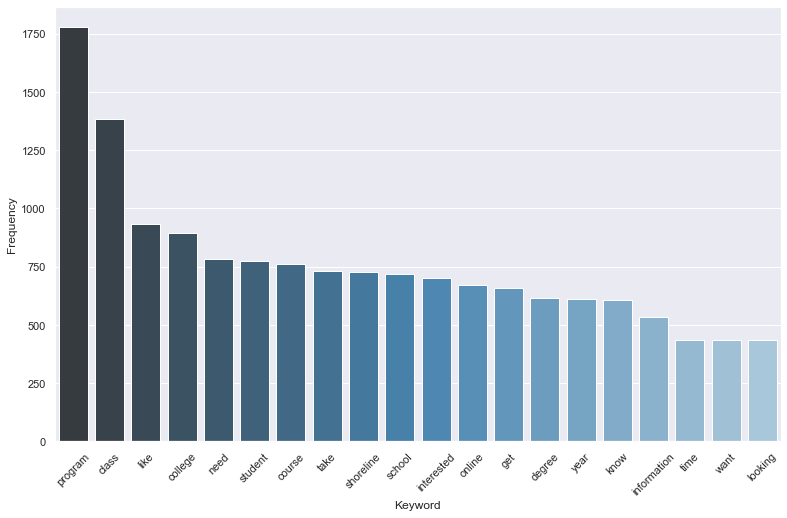

In [15]:
# View most frequently occuring keywords
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in      
                   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                       reverse=True)
    return words_freq[:n]

# Convert most freq words to dataframe for plotting bar plot, save as CSV
top_words = get_top_n_words(corpus, n=20)
top_df = pandas.DataFrame(top_words)
top_df.columns=["Keyword", "Frequency"]
print(top_df)
top_df.to_csv(file_prefix + '_top_words.csv')

# Barplot of most freq words
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="Keyword", y="Frequency", data=top_df, palette="Blues_d")
g.set_xticklabels(g.get_xticklabels(), rotation=45)
g.figure.savefig(file_prefix + "_keyword.png", bbox_inches = "tight")

                  Bi-gram  Frequency
0       community college        322
1             high school        222
2               like know        195
3         nursing program        186
4          dental hygiene        183
5     shoreline community        179
6         hygiene program        150
7               need take        135
8   international student        123
9           financial aid        114
10           online class        111
11              full time        103
12               let know         93
13        bachelor degree         93
14           fall quarter         86
15       associate degree         84
16             please let         76
17             take class         76
18          running start         76
19          pre requisite         75


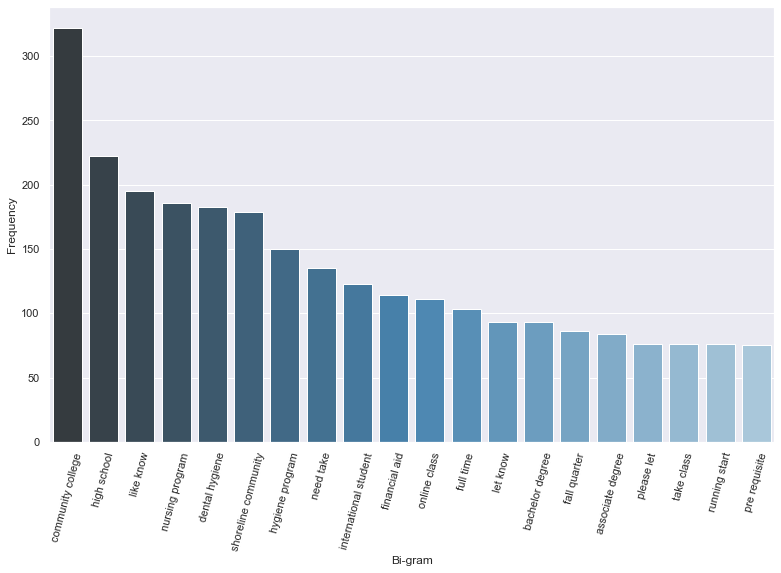

In [16]:
# Most frequently occuring bigrams
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq bigrams to dataframe for plotting bar plot, save as CSV
top2_words = get_top_n2_words(corpus, n=20)
top2_df = pandas.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Frequency"]
print(top2_df)
top2_df.to_csv(file_prefix + '_bigrams.csv')

# Barplot of most freq Bi-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Frequency", data=top2_df, palette="Blues_d")
h.set_xticklabels(h.get_xticklabels(), rotation=75)
h.figure.savefig(file_prefix + "_bi-gram.png", bbox_inches = "tight")

                         Tri-gram  Frequency
0     shoreline community college        170
1          dental hygiene program        141
2                 please let know         73
3                  work full time         32
4            look forward hearing         27
5                 class need take         26
6       early childhood education         26
7       interested dental hygiene         26
8             high school diploma         25
9           apply nursing program         24
10          running start student         21
11              student id number         19
12                 dear sir madam         19
13     interested nursing program         19
14       dental hygienist program         18
15  health information technology         18
16              working full time         16
17      everett community college         16
18                 step need take         16
19      edmonds community college         16


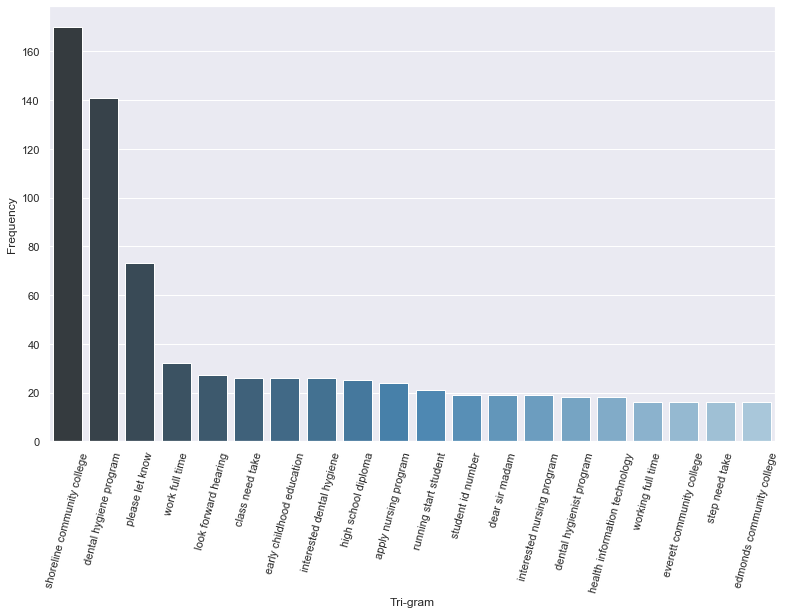

In [17]:
# Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

# Convert most freq trigrams to dataframe for plotting bar plot, save as CSV
top3_words = get_top_n3_words(corpus, n=20)
top3_df = pandas.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Frequency"]
print(top3_df)
top3_df.to_csv(file_prefix + '_trigrams.csv')

# Barplot of most freq Tri-grams
import seaborn as sns
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Frequency", data=top3_df, palette="Blues_d")
j.set_xticklabels(j.get_xticklabels(), rotation=75)
j.figure.savefig(file_prefix + "_tri-gram.png", bbox_inches = "tight")


## 5. Extract a list of top TF-IDF terms

In [18]:
# Get TF-IDF (term frequency/inverse document frequency) -- 
# TF-IDF lists word frequency scores that highlight words that 
# are more important to the context rather than those that 
# appear frequently across documents

from sklearn.feature_extraction.text import TfidfTransformer 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)

# Get feature names
feature_names=cv.get_feature_names()
 
# Fetch document for which keywords needs to be extracted
doc=corpus[ds_count-1]
 
# Generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [19]:
# Sort tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=25):
    
    # Use only topn items from vector
    sorted_items = sorted_items[:topn]
    score_vals = []
    feature_vals = []
    
    # Word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        # Keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    # Create tuples of feature,score
    # Results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    return results

# Sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

# Extract only the top n; n here is 25
keywords=extract_topn_from_vector(feature_names,sorted_items,25)
 
# Print the results, save as CSV
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])

import csv
with open(file_prefix + 'td_idf.csv', 'w', newline="") as csv_file:  
    writer = csv.writer(csv_file)
    writer.writerow(["Keyword", "Importance"])
    for key, value in keywords.items():
       writer.writerow([key, value])


Abstract:
online net price calculator cost attendance shoreline show figure year old number find current overall cost attendance

Keywords:
cost attendance 0.488
attendance 0.45
overall cost 0.26
calculator 0.26
cost 0.257
number find 0.251
overall 0.216
price 0.2
show 0.189
figure 0.183
year old 0.162
old 0.152
current 0.152
number 0.149
find 0.135
year 0.096
online 0.093
shoreline 0.09
